In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import cm
import matplotlib as mpl    
import seaborn as sns

mpl.rc('font',family='serif')

import pickle


/home/polichinel/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/polichinel/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/polichinel/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/polichinel/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# pkl_file = open('xgboost_dict_of_dicts.pkl', 'rb')
# dict_of_dicts = pickle.load(pkl_file)
# pkl_file.close()

pkl_file = open('new_test_df.pkl', 'rb')
df_test = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('new_train_df.pkl', 'rb')
df_train = pickle.load(pkl_file)
pkl_file.close()

df_test['binary_best'] = (df_test['best']>0)+0
df_train['binary_best']  = (df_train['best']>0)+0

pkl_file = open('xgboost_dict_of_dicts_new.pkl', 'rb')
dict_of_dicts = pickle.load(pkl_file)
pkl_file.close()

In [82]:
def ap_score(fig_title):

    plt.figure(figsize=[13,5])

    test_years = np.arange(2013,2018,1)
    colors = sns.color_palette("hls", test_years.shape[0])
    # colors = sns.hls_palette(8, l=.5, s=.5)

    for i, j in enumerate(test_years):
        point_est = np.mean(dict_of_dicts[str(j)]['ap'])

        plot = sns.kdeplot(dict_of_dicts[str(j)]['ap'], 
                           color = colors[i], label = f'{j}')# point est.: {round(point_est,2)}')

        x, y = plot.lines[i].get_data()        
        plt.vlines(point_est, max(y) - 3, max(y) + 3, color = colors[i])
        plt.annotate(f'{round(point_est,2)}', (point_est+0.002, max(y)),
                     color = colors[i], fontsize = 14)

    plt.ylim(0,55)
    plt.xlim(0.35,0.60)
    plt.xticks(fontsize = 12)
    plt.yticks([], fontsize = 12)

    plt.legend(loc=2, fontsize = 14)
    plt.title('Average precision scores\n(out-of-sample)', fontsize = 16)
    plt.xlabel('Average precision', fontsize = 14)

    plt.savefig(fig_title, bbox_inches="tight")

    plt.show()

/home/polichinel/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


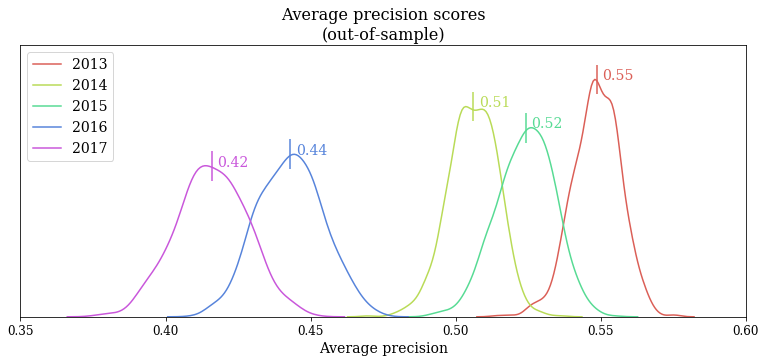

In [83]:
ap_score('ap_scores.pdf')

In [111]:
sum(np.array(dict_of_dicts['2014']['ap']) <= np.array(dict_of_dicts['2016']['ap']))/1000

0.0

In [112]:
sum(np.array(dict_of_dicts['2015']['ap']) <= np.array(dict_of_dicts['2016']['ap']))/1000

0.0

In [113]:
sum(np.array(dict_of_dicts['2015']['ap']) >= np.array(dict_of_dicts['2013']['ap']))/1000

0.024

In [114]:
sum(np.array(dict_of_dicts['2015']['ap']) >= np.array(dict_of_dicts['2014']['ap']))/1000

0.893

In [5]:
def ap_trend(fig_title):

    ap_means = []
    ap_highs = []
    ap_lows = []
    years = []

    for i in np.arange(2013,2018,1):
        ap_means.append(dict_of_dicts[str(i)]['mean_ap'])
        ap_highs.append(dict_of_dicts[str(i)]['high_ap'])
        ap_lows.append(dict_of_dicts[str(i)]['low_ap'])

        years.append(i)


    plt.figure(figsize=[13,5])

    plt.plot(years,ap_means, '-o', color = 'C1')
    plt.fill_between(years, ap_highs, ap_lows, color = 'lightgray', alpha = 0.5)

    plt.vlines(2012+3,0,0.6,color='darksalmon', linestyle='dashed',alpha = 0.8)

    plt.xticks(years)

    plt.xlim(2013,2017)
    plt.ylim(0.35,0.6)

    plt.savefig(fig_title, bbox_inches="tight")

    plt.show()

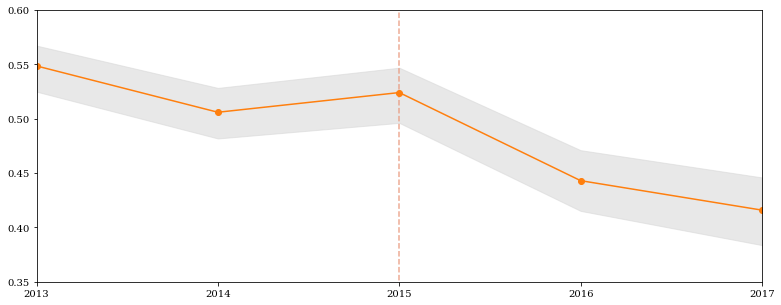

In [6]:
ap_trend('ap_trend.pdf')

In [93]:
def ap_trend_alt(fig_title):

    years = list(dict_of_dicts.keys())
    ap_means = []
    plt.figure(figsize=[13,5])


    for i in np.arange(0,1000,1):
        list_of_ap = [] 
        for year in years:
            list_of_ap.append(dict_of_dicts[year]['ap'][i])

        plt.plot(years, list_of_ap, color='C0', alpha=0.01)

    for i in np.arange(2013,2018,1):
        ap_means.append(dict_of_dicts[str(i)]['mean_ap'])

    plt.plot(years, ap_means, '-o', color = 'C1')
    
    plt.vlines(years[2],0,0.6,color='darksalmon', linestyle='dashed',alpha = 0.8)

    
    cred_label = "Average precision 1000 samples"
    mean_label = 'Average precision point estimat (mean)'
    cred_line = mlines.Line2D([], [], color='C0', marker='_', markersize=15, label=cred_label)
    mean_line = mlines.Line2D([], [], color='C1', marker='o', markersize=15, label=mean_label)
    plt.legend(handles=[mean_line, cred_line],frameon = False, fontsize = 14)

    plt.title('Average precision trend\n(out-of-sample)', fontsize = 16)
    plt.xlabel('years', fontsize = 14)
    plt.ylabel('AP', fontsize = 14)
    
    plt.xlim(years[0],years[-1])
    plt.ylim(0.35,0.6)

    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    
    plt.savefig(fig_title, bbox_inches="tight")
    

    plt.show()

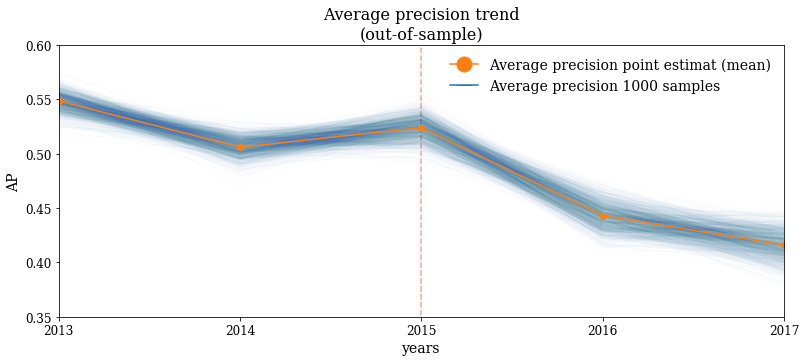

In [94]:
ap_trend_alt('ap_trend_alt.pdf')

In [121]:
df_test[df_test['year']==2014]['binary_best'].sum()/df_test[df_test['year']==2014]['binary_best'].shape

array([0.04979095])

In [177]:
df_test[df_test['year']==2015]['binary_best'].sum()/df_test[df_test['year']==2015]['binary_best'].shape

array([0.05304881])

In [140]:
def pr_curve(fig_title, year):
    
    baseline = df_test[df_test['year']==year]['binary_best'].sum()/df_test[df_test['year']==year]['binary_best'].shape
    
    dict_of_metrics = dict_of_dicts[str(year)]

    plt.figure(figsize=[9,9])

    for i in np.arange(0,1000,1):
        plt.plot(dict_of_metrics['recall'][i], dict_of_metrics['precision'][i], color='C0', alpha=0.01)

    mean_ap = dict_of_metrics['mean_ap']
    high_ap = dict_of_metrics['high_ap']
    low_ap = dict_of_metrics['low_ap']

    plt.plot(dict_of_metrics['recall_mean'], dict_of_metrics['precision_mean'], color='C1', alpha=1)
    plt.hlines(baseline, 0, 1, color='gray', linestyle='--')

    
    plt.title(f'Precision-Recall Curve {year}', fontsize = 16)
    
    plt.xlabel('Recall', fontsize = 14)
    plt.ylabel('Precision', fontsize = 14)
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.05])

    sns.despine()

    cred_label = "Average precision 99% credibility interval: " + str(low_ap.round(3)) + '-' + str(high_ap.round(2))
    mean_label = 'Average precision point estimat (mean): ' + str(mean_ap.round(3))
    random_label = '"Random" baseline'

    cred_line = mlines.Line2D([], [], color='C0', marker='_', markersize=15, label=cred_label)

    mean_line = mlines.Line2D([], [], color='C1', marker='_', markersize=15, label=mean_label)
    
    random_line = mlines.Line2D([], [], color='gray', marker='_', markersize=15, label=random_label)

    plt.legend(handles=[mean_line, cred_line, random_line],frameon = False, fontsize = 14)

    plt.savefig(fig_title, bbox_inches="tight")

    plt.show()


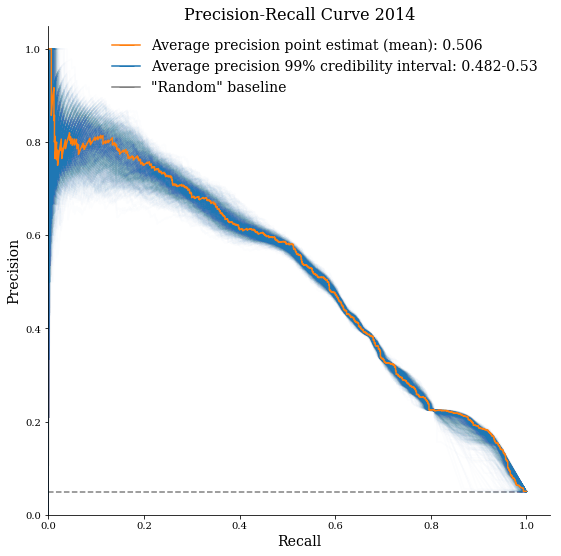

In [142]:
pr_curve('PR_2014.pdf', 2014)

In [165]:
# years  = [2014,2015]

def pr_curves(fig_title, years):

    fig, axes = plt.subplots(1, len(years), sharey=False,figsize=(13,5))

    for i, j in enumerate(years):
        baseline = df_test[df_test['year']==j]['binary_best'].sum()/df_test[df_test['year']==j]['binary_best'].shape

        dict_of_metrics = dict_of_dicts[str(j)]  
        mean_ap = dict_of_metrics['mean_ap']
        high_ap = dict_of_metrics['high_ap']
        low_ap = dict_of_metrics['low_ap']

    #     mean_auc =  np.mean(dict_of_metrics['auc'])
    #     high_auc = np.percentile(np.array(dict_of_metrics['auc']),97.5)
    #     low_auc = np.percentile(np.array(dict_of_metrics['auc']),2.5)


        for n in np.arange(0,1000,1):
            axes[i].plot(dict_of_metrics['recall'][n], dict_of_metrics['precision'][n], color='C0', alpha=0.01)

        axes[i].plot(dict_of_metrics['recall_mean'], dict_of_metrics['precision_mean'], color='C1', alpha=1)
        axes[i].hlines(baseline, 0, 1, color='gray', linestyle='--')
        axes[i].set_title(f'{j}', fontsize = 14)

        cred_label = f'AP 99% cred. int.: {low_ap.round(2)} - {high_ap.round(2)}'
        mean_label = f'AP point est.: {mean_ap.round(2)}'
        random_label = '"Random" baseline'

        cred_line = mlines.Line2D([], [], color='C0', marker='_', markersize=15, label=cred_label)
        mean_line = mlines.Line2D([], [], color='C1', marker='_', markersize=15, label=mean_label)
        random_line = mlines.Line2D([], [], color='gray', marker='_', markersize=15, label=random_label)


        axes[i].legend(handles=[mean_line, cred_line, random_line], frameon = False, fontsize = 14, loc = 1)

    #     auc_text = f'ROC-AUC point est.: {mean_auc.round(2)}\nROC-AUC 99% credibility int.: {low_auc.round(2)} - {high_auc.round(2)}'

    #     axes[i].annotate(auc_text,(0.05,0.1), fontsize = 14)

        axes[i].set_xlabel('Recall', fontsize = 14)
        axes[i].set_ylim([0.0, 1.05])
        axes[i].set_xlim([0.0, 1.05])
        
        axes[i].set_xticklabels(np.arange(0,1.1,0.2).round(1),fontsize=12)


        if i == 0:
            axes[i].set_ylabel('Precision', fontsize = 14)
            axes[i].set_yticklabels(np.arange(0,1.1,0.2).round(1),fontsize=12)

            
        else:
            axes[i].set_ylabel('')
            axes[i].set_yticklabels([],fontsize=12)


    fig.suptitle('Precision-Recall Curves', fontsize = 16)    

    plt.savefig(fig_title, bbox_inches="tight")

    plt.show()

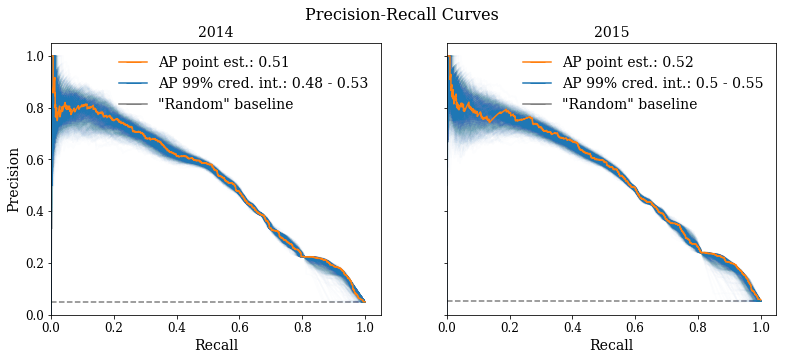

In [166]:
pr_curves('pr_curves_14_15.pdf', [2014,2015])

In [11]:
# pkl_file = open('xgboost_dict_of_dicts_new.pkl', 'rb')
# dict_of_dicts = pickle.load(pkl_file)
# pkl_file.close()

In [175]:
def roc_curves(fig_title, years):

    fig, axes = plt.subplots(1, len(years), sharey=False,figsize=(13,5))

    for i, j in enumerate(years):

        dict_of_metrics = dict_of_dicts[str(j)]  

        mean_auc = np.mean(dict_of_metrics['auc'])
        high_auc = np.percentile(np.array(dict_of_metrics['auc']),99.5)
        low_auc = np.percentile(np.array(dict_of_metrics['auc']),00.5) 

        for n in np.arange(0,1000,1): #1000
            axes[i].plot(dict_of_metrics['fpr'][n], dict_of_metrics['tpr'][n], color='C0', alpha=0.01)

        axes[i].plot(dict_of_metrics['fpr_mean'], dict_of_metrics['tpr_mean'], color='C1', alpha=1)
        axes[i].plot([0, 1], [0, 1], color='gray', linestyle='--')
        axes[i].set_title(f'{j}', fontsize = 14)

        cred_label = f'AUC 99% cred. int.: {low_auc.round(2)} - {high_auc.round(2)}'
        mean_label = f'AUC point est.: {mean_auc.round(2)}'
        random_label = '"Random" baseline'


        cred_line = mlines.Line2D([], [], color='C0', marker='_', markersize=15, label=cred_label)

        mean_line = mlines.Line2D([], [], color='C1', marker='_', markersize=15, label=mean_label)

        random_line = mlines.Line2D([], [], color='gray', marker='_', markersize=15, label=random_label)

        axes[i].legend(handles=[mean_line, cred_line, random_line], frameon = False, fontsize = 14, loc = 4)

    
    #     auc_text = f'ROC-AUC point est.: {mean_auc.round(2)}\nROC-AUC 99% credibility int.: {low_auc.round(2)} - {high_auc.round(2)}'

    #     axes[i].annotate(auc_text,(0.05,0.1), fontsize = 14)

        axes[i].set_xlabel('False positive rate', fontsize = 14)
        axes[i].set_ylim([0.0, 1.05])
        axes[i].set_xlim([0.0, 1.05])
        
        axes[i].set_xticklabels(np.arange(0,1.1,0.2).round(1),fontsize=12)


        if i == 0:
            axes[i].set_ylabel('True positive rate', fontsize = 14)
            axes[i].set_yticklabels(np.arange(0,1.1,0.2).round(1),fontsize=12)

            
        else:
            axes[i].set_ylabel('')
            axes[i].set_yticklabels([],fontsize=12)


    fig.suptitle('ROC Curves', fontsize = 16)    

    plt.savefig(fig_title, bbox_inches="tight")

    plt.show()

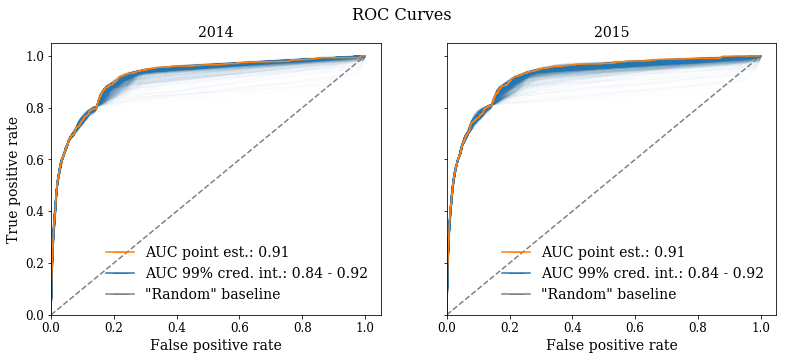

In [176]:
roc_curves('roc_curves_14_15.pdf', [2014,2015])

In [33]:
def prob_map(year):
    df_test_sub_ = df_test[df_test['year']==year].copy()
    df_test_sub_['predsB'] = dict_of_dicts[str(year)]['mean_preds']
    df_test_sub_.plot(column = 'predsB', figsize=[15,5], vmin = 0, vmax = 1, legend=True)
    
    # need predefined min, max and colorbar!
    
    plt.ylim(-10,50)
    plt.xlim(-20,100)
    plt.xlabel('longitude', fontsize = 14)
    plt.ylabel('latitude', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    
    plt.title(f'Estimated probabilities of conflict: {year}', fontsize = 16)
  
    fig_title = f'prop_map_{year}.pdf'
    plt.savefig(fig_title, bbox_inches="tight")

    plt.show()

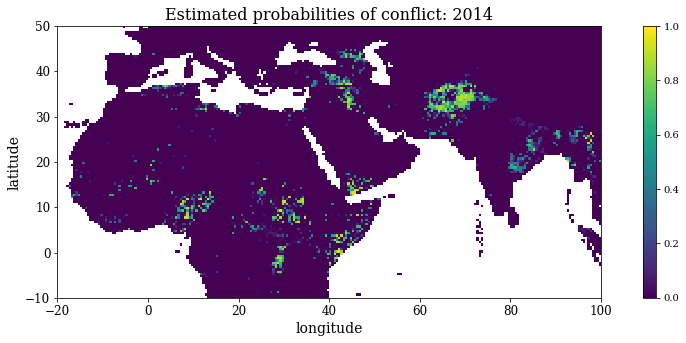

In [34]:
prob_map(2014)

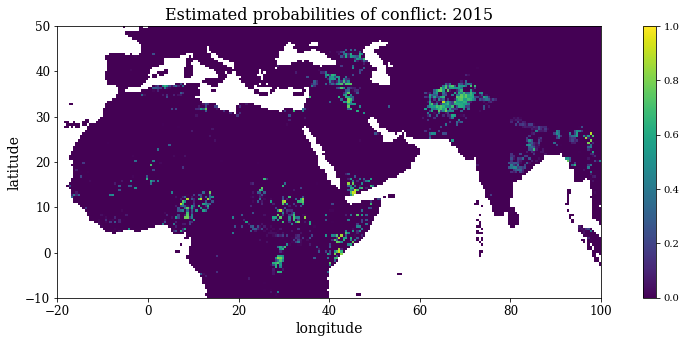

In [35]:
prob_map(2015)

In [118]:
def confusion_map(year, threshold):
    viridis = cm.get_cmap('viridis', 4)
    
    sub_df_test = df_test[df_test['year']==year].copy()
    sub_df_test['predsB'] = dict_of_dicts[str(year)]['mean_preds']

    binary_pred = (sub_df_test['predsB']>threshold)*1 # should be 0.15 to match posterior of 2012 (last observed year) distrbution with actually output
    sub_df_test['binary_pred'] =  binary_pred
    
    sub_df_test['TP'] = ((sub_df_test['binary_pred'] == 1) & (sub_df_test['binary_best'] == 1))*1
    sub_df_test['TN'] = ((sub_df_test['binary_pred'] == 0) & (sub_df_test['binary_best'] == 0))*1
    sub_df_test['FP'] = ((sub_df_test['binary_pred'] == 1) & (sub_df_test['binary_best'] == 0))*1
    sub_df_test['FN'] = ((sub_df_test['binary_pred'] == 0) & (sub_df_test['binary_best'] == 1))*1

    cats_list = ['TN','TP','FP','FN']

    plt.figure(figsize=[13.8,7])

#     colors = ['lightgrey','salmon','teal','crimson']
#     colors = ['lightsteelblue','indianred','steelblue','maroon']
#     colors = ['steelblue','maroon','lightsteelblue','indianred']

    colors = [viridis.colors[0],viridis.colors[3],viridis.colors[1],viridis.colors[2]]


    labels = ['true negatives', 'true positives', 'false positives', 'false negatives']

    for i, j in enumerate(cats_list):
        X = np.array([sub_df_test[sub_df_test[j]==1]['xcoord'], sub_df_test[sub_df_test[j]==1]['ycoord']]).T

        plt.scatter(X[:,0], X[:,1], s=9, c = colors[i], marker='s', label = labels[i])

    plt.ylim(-10,50)
    plt.xlim(-20,100)
    plt.xlabel('longitude', fontsize = 14)
    plt.ylabel('latitude', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
        
    plt.title('Predictions {}\n Last year included i model: 2012\nThreshold: {}% probability of conflict'.format(year,threshold * 100)
              , fontsize = 16)
    plt.legend(fontsize = 14)

    fig_title = 'confusion_map_{}.pdf'.format(year)
    plt.savefig(fig_title, bbox_inches="tight")

    plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

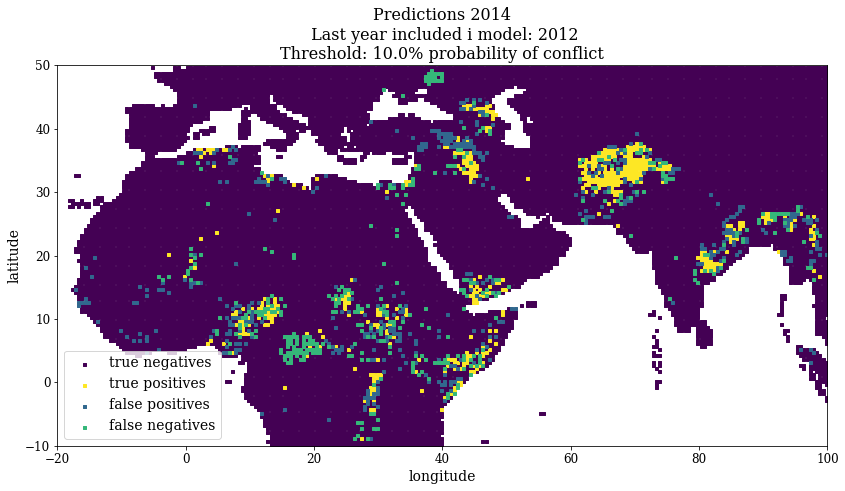

In [119]:
confusion_map(2014,0.10)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

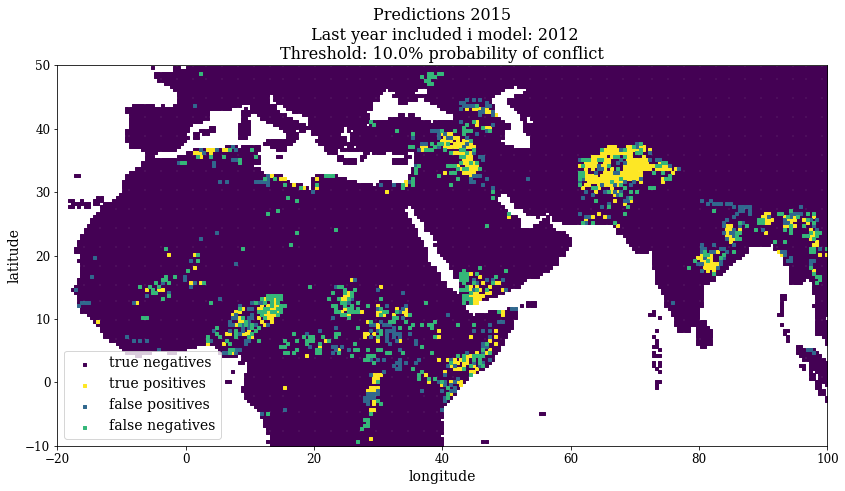

In [120]:
confusion_map(2015,0.10)

<Figure size 648x648 with 0 Axes>

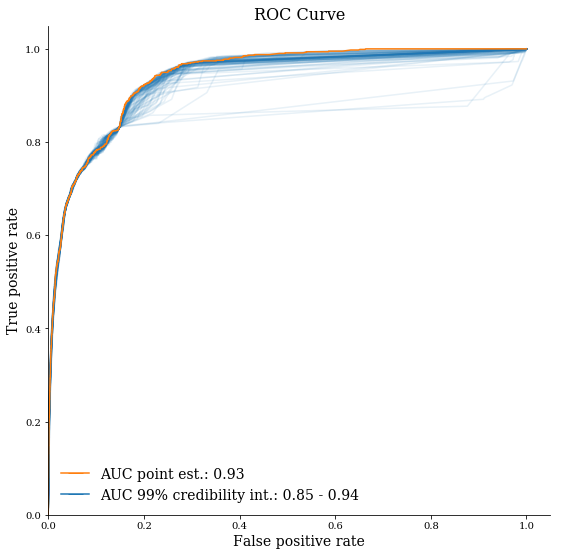

In [143]:
dict_of_metrics = dict_of_dicts['2013']

plt.figure(figsize=[9,9])

for i in np.arange(0,100,1):
    plt.plot(dict_of_metrics['fpr'][i], dict_of_metrics['tpr'][i], color='C0', alpha=0.1)

mean_auc = np.mean(dict_of_metrics['auc'])
high_auc = np.percentile(np.array(dict_of_metrics['auc']),99.5)
low_auc = np.percentile(np.array(dict_of_metrics['auc']),00.5) 
    
plt.plot(dict_of_metrics['fpr_mean'], dict_of_metrics['tpr_mean'], color='C1', alpha=1)

plt.title('ROC Curve', fontsize = 16)
    
plt.xlabel('False positive rate', fontsize = 14)
plt.ylabel('True positive rate', fontsize = 14)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])

sns.despine()


cred_label = f'AUC 99% credibility int.: {low_auc.round(2)} - {high_auc.round(2)}'
mean_label = f'AUC point est.: {mean_auc.round(2)}'

cred_line = mlines.Line2D([], [], color='C0', marker='_', markersize=15, label=cred_label)

mean_line = mlines.Line2D([], [], color='C1', marker='_', markersize=15, label=mean_label)

plt.legend(handles=[mean_line, cred_line],frameon = False, fontsize = 14)

plt.show()


In [69]:
np.mean(dict_of_metrics['auc'])
np.percentile(np.array(dict_of_metrics['auc']),97.5)
np.percentile(np.array(dict_of_metrics['auc']),2.5)

0.9130714806078802

In [97]:
dict_of_metrics.keys()

dict_keys(['auc', 'ap', 'recall', 'precision', 'preds1', 'preds0', 'preds_bayes', 'feature_imp', 'mean_ap', 'high_ap', 'low_ap', 'recall_mean', 'precision_mean', 'mean_preds'])

In [ ]:
np.array(dict_of_metrics['auc']).percentile

In [ ]:
np.array(dict_of_metrics['auc']).quantile